In [1]:
import pandas as pd
import numpy as np

membaca data set

In [2]:
dataset = pd.read_csv('diabetes_prediction_dataset.csv')
dataset.info()
dataset['diabetes'] = dataset['diabetes'].replace(1, str('Positif Diabetes'))
dataset['diabetes'] = dataset['diabetes'].replace(0, str('Negatif Diabetes'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


merubah beberapa data string menjadi data float

In [3]:
dataset['gender'] = dataset['gender'].replace('Female', float(1))
dataset['gender'] = dataset['gender'].replace('Male', float(0))
dataset['gender'] = dataset['gender'].replace('Other', float(2))

dataset['smoking_history'] = dataset['smoking_history'].replace('never', float(0))
dataset['smoking_history'] = dataset['smoking_history'].replace('No Info', float(0.2))
dataset['smoking_history'] = dataset['smoking_history'].replace('not current', float(0.4))
dataset['smoking_history'] = dataset['smoking_history'].replace('former', float(0.6))
dataset['smoking_history'] = dataset['smoking_history'].replace('current', float(0.8))
dataset['smoking_history'] = dataset['smoking_history'].replace('ever', float(1))

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  float64
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  float64
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  object 
dtypes: float64(5), int64(3), object(1)
memory usage: 6.9+ MB


Membagi data independent(X) 0-7 dan Dependent(y) 8

In [4]:
X = dataset.iloc[:,:8]
y =  dataset.iloc[:,8]


Melakukan split data (data train dan data test)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

membuat model

In [6]:
from sklearn.tree import DecisionTreeClassifier
ID3_diabetes = DecisionTreeClassifier(max_leaf_nodes=10,random_state=0)
ID3_diabetes.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [7]:
y_predik = ID3_diabetes.predict(x_test)
ID3_diabetes.classes_
y_train.value_counts()

diabetes
Negatif Diabetes    64039
Positif Diabetes     5961
Name: count, dtype: int64

cek akurasi

In [8]:
from sklearn.metrics import accuracy_score, classification_report
akurasi = accuracy_score(y_test, y_predik)
print("Nilai Akurasi = ", akurasi)
print(classification_report(y_test,y_predik))

Nilai Akurasi =  0.9713666666666667
                  precision    recall  f1-score   support

Negatif Diabetes       0.97      1.00      0.98     27461
Positif Diabetes       1.00      0.66      0.80      2539

        accuracy                           0.97     30000
       macro avg       0.98      0.83      0.89     30000
    weighted avg       0.97      0.97      0.97     30000



melakukan tes dengan data baru

In [9]:
data_baru = pd.read_excel('databat_test_diabetes_prediction.xlsx')
x_baru = data_baru.iloc[:,:]


In [10]:
x_baru['gender'] = x_baru['gender'].replace('Female', float(1))
x_baru['gender'] = x_baru['gender'].replace('Male', float(0))
x_baru['gender'] = x_baru['gender'].replace('Other', float(2))
x_baru['smoking_history'] = x_baru['smoking_history'].replace('never', float(0))
x_baru['smoking_history'] = x_baru['smoking_history'].replace('No Info', float(0.2))
x_baru['smoking_history'] = x_baru['smoking_history'].replace('not current', float(0.4))
x_baru['smoking_history'] = x_baru['smoking_history'].replace('former', float(0.6))
x_baru['smoking_history'] = x_baru['smoking_history'].replace('current', float(0.8))
x_baru['smoking_history'] = x_baru['smoking_history'].replace('ever', float(1))

In [11]:
y_baru = ID3_diabetes.predict(x_baru)
data_baru['Diabetes'] = y_baru

data_baru


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Diabetes
0,Female,46,0,1,not current,25.19,6.1,155,Negatif Diabetes
1,Female,67,1,1,never,27.32,6.5,200,Negatif Diabetes
2,Female,44,0,0,never,15.94,5.8,145,Negatif Diabetes
3,Male,21,0,1,No Info,15.80,6.2,126,Negatif Diabetes
4,Male,30,0,0,never,27.01,6.0,100,Negatif Diabetes
5,Female,59,0,1,never,27.32,6.6,85,Negatif Diabetes
6,Female,27,1,0,former,22.19,6.2,85,Negatif Diabetes
7,Female,59,0,1,No Info,27.45,5.7,130,Negatif Diabetes
8,Male,19,0,0,No Info,17.98,5.0,200,Negatif Diabetes
9,Male,13,0,1,former,27.32,6.5,260,Positif Diabetes


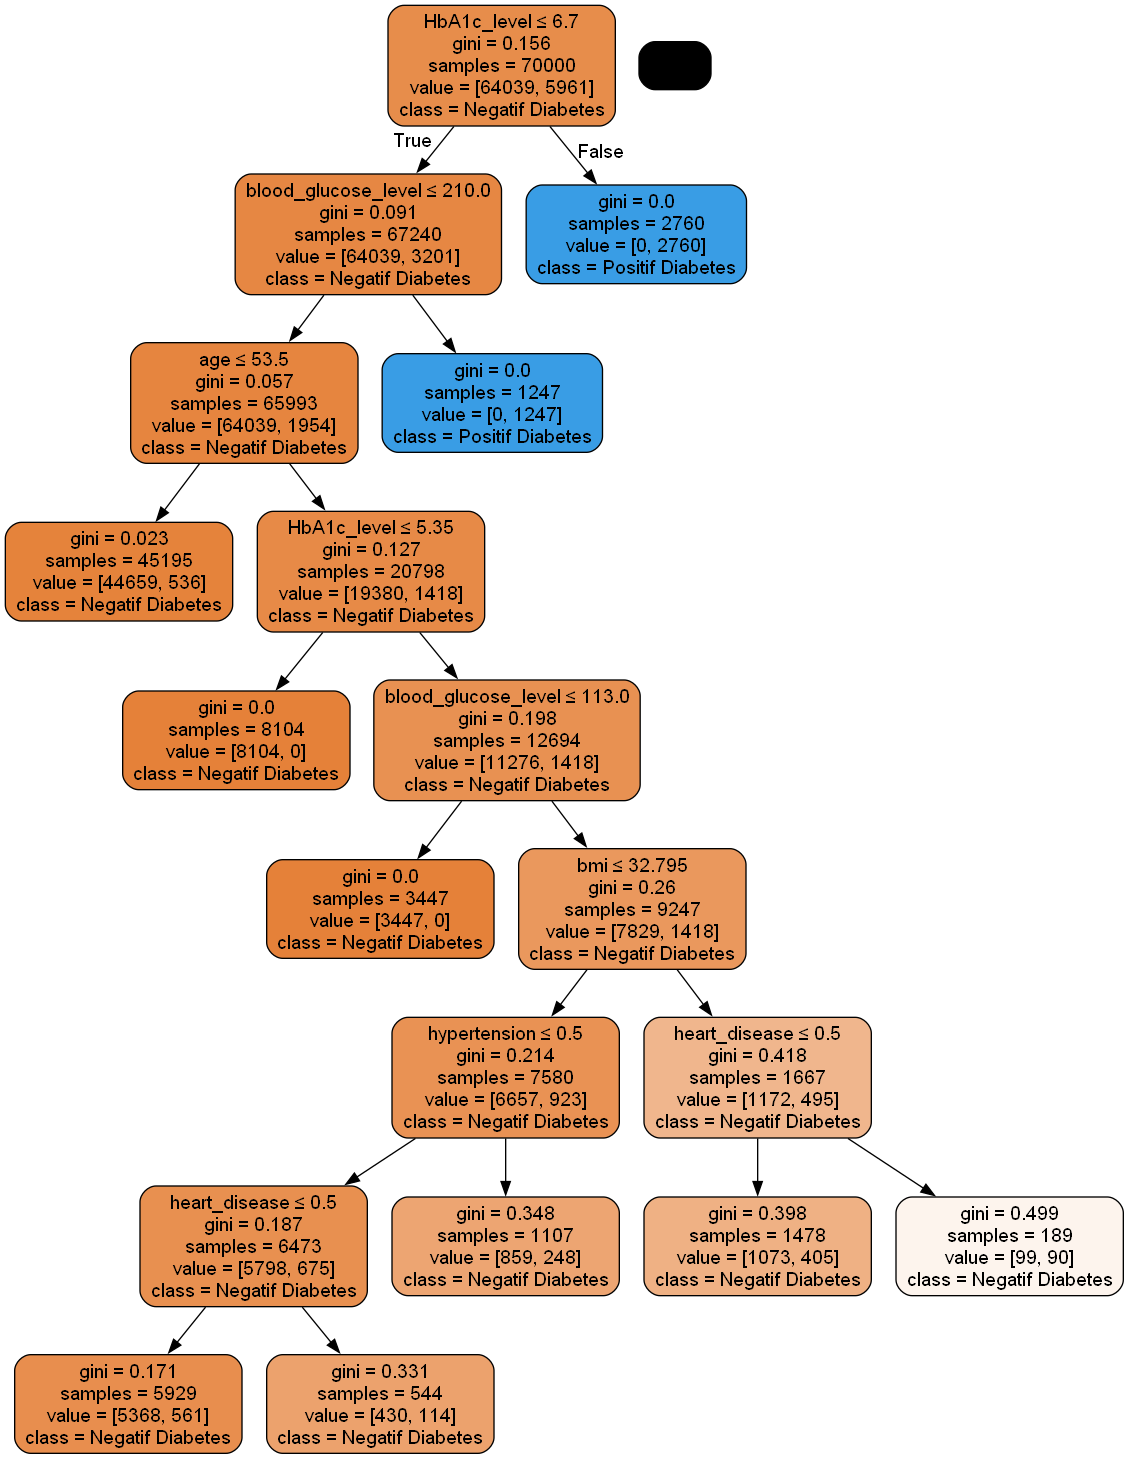

In [12]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()

export_graphviz(ID3_diabetes,
                out_file=dot_data,
                feature_names=x_train.columns,
                class_names=ID3_diabetes.classes_,
                filled=True,
                rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_tree.png')
Image(graph.create_png())

In [13]:
from sklearn.tree import _tree

def tree_to_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"if {name} <= {threshold}:")
            recurse(tree_.children_left[node])
            print(f"else:  # if {name} > {threshold}")
            recurse(tree_.children_right[node])
        else:
            class_idx = np.argmax(tree_.value[node])
            class_name = class_names[class_idx]
            print(f"Maka {class_name}")

    recurse(0)

tree_to_rules(ID3_diabetes, feature_names=x_train.columns, class_names=ID3_diabetes.classes_)


if HbA1c_level <= 6.700000047683716:
if blood_glucose_level <= 210.0:
if age <= 53.5:
Maka Negatif Diabetes
else:  # if age > 53.5
if HbA1c_level <= 5.349999904632568:
Maka Negatif Diabetes
else:  # if HbA1c_level > 5.349999904632568
if blood_glucose_level <= 113.0:
Maka Negatif Diabetes
else:  # if blood_glucose_level > 113.0
if bmi <= 32.795000076293945:
if hypertension <= 0.5:
if heart_disease <= 0.5:
Maka Negatif Diabetes
else:  # if heart_disease > 0.5
Maka Negatif Diabetes
else:  # if hypertension > 0.5
Maka Negatif Diabetes
else:  # if bmi > 32.795000076293945
if heart_disease <= 0.5:
Maka Negatif Diabetes
else:  # if heart_disease > 0.5
Maka Negatif Diabetes
else:  # if blood_glucose_level > 210.0
Maka Positif Diabetes
else:  # if HbA1c_level > 6.700000047683716
Maka Positif Diabetes
